### In this notebook we do PCA on MNIST to reduce the dataset to about 10-15 dimensions
We will compute PH of the dataset with itself and see if there are matchings with a high score which could be approximated by a subset.

This might not work.

First, copy the data `test.csv` and `train.csv` from https://www.kaggle.com/c/digit-recognizer/data and store it into the folder `MNIST_data`

We have followed this notebook https://github.com/ranasingh-gkp/PCA-TSNE-on-MNIST-dataset/blob/master/14_15_16(PCA%2CT_SNE).ipynb

In [1]:
import numpy as np
from numpy.random import default_rng
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import scipy.spatial.distance as dist
from sklearn import decomposition

In [2]:
X_raw_l = pd.read_csv('mnist_data/train.csv')

In [3]:
y = X_raw_l["label"]

In [4]:
X_raw = X_raw_l.drop("label", axis=1)

In [5]:
X_scal = StandardScaler().fit_transform(X_raw)

In [6]:
pca = decomposition.PCA()
pca.n_components = 15
X = pca.fit_transform(X_scal)

In [7]:
rng = default_rng(22)

Compute PH, we will have to bound.
For this, we take 1.5% of the data

In [8]:
X_s = rng.choice(X, int(X.shape[0]*0.015), replace=False)
X_s.shape[0]

630

In [9]:
import IBloFunMatch_inter as ibfm
# output_dir = "output/" 
output_dir = "output\\" # (Windows)

Dist_X = dist.squareform(dist.pdist(X_s))

In [10]:
output_data_ibfm = ibfm.get_IBloFunMatch_subset(Dist_X, Dist_X, list(range(X_s.shape[0])), output_dir, num_it=4)

In [14]:
output_data_ibfm["induced_matching"]

[3, 9, 5, 8, 0, 4, 6, 2, -1, -1, 17, 13, 12, 15, 16, 14]

In [15]:
strong_treshold = 1
indices_strong_matchings = np.nonzero(np.array(output_data_ibfm["matching_strengths"])>strong_treshold)[0]
indices_strong_matchings

array([347, 434], dtype=int64)

In [16]:
output_data_ibfm["S_barcode"][indices_strong_matchings]

IndexError: index 347 is out of bounds for axis 0 with size 16

[0.136451 0.208793] <--> [0.116315 0.204681], strength: 0.273


ValueError: alpha (1.3344130622773975) is outside 0-1 range

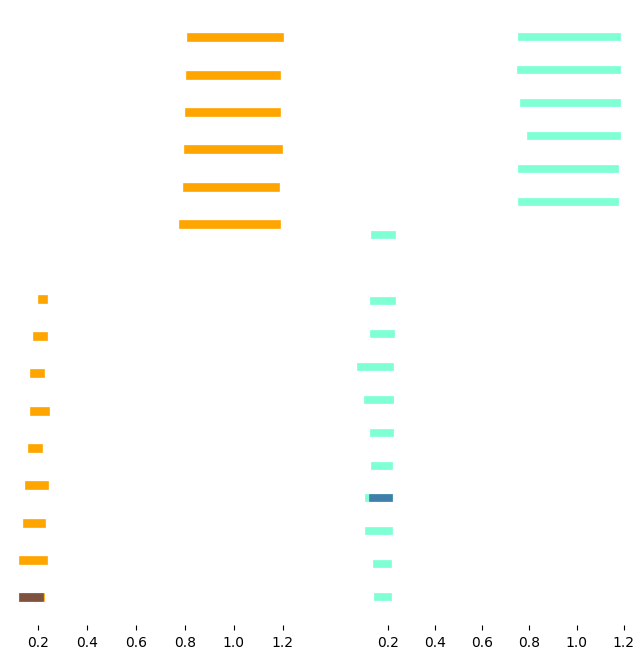

In [17]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,8))
ibfm.plot_matching(output_data_ibfm, output_dir, ax, fig)
plt.savefig(f"plots/MNIST/self_matching.png")